# TP1 : Support Vector Machines & Decision Trees
### (Part 1)

## A. Génération de données 

#### On génère une base de données synthétiques (B1).
#### On normalise puis on fait une réduction de dimension des données normalisées à l'aide d'une PCA.

In [40]:
#import
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X,y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.0, center_box=(-10.0, 10.0))
#X,y = make_blobs(n_samples=1000, n_features=30, centers=2, cluster_std=1.0, center_box=(-10.0, 10.0))

print((X.shape), "nous indique que nous avons 1000 échantillons de 2 features chacun.")
print("Les labels sont indiqués par y et sont au nombre de",len(np.unique(y)),".") 

(1000, 2) nous indique que nous avons 1000 échantillons de 2 features chacun.
Les labels sont indiqués par y et sont au nombre de 2 .


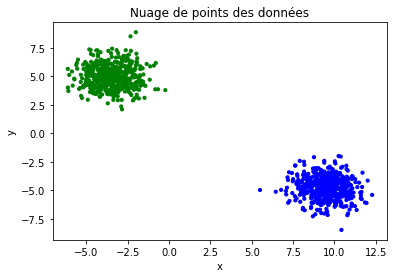

In [41]:
#on dessine les nuages de points
colors = np.array([x for x in "bgrcmyk"])
plt.scatter(X[:,0],X[:,1], color=colors[y].tolist(), s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nuage de points des données')
plt.show()

In [3]:
#on normalise nos données 
#scaler = StandardScaler()
#X_norm = scaler.fit_transform(X)

Il n'y a pas besoin de faire de réduction de dimensions puisqu'il n'y a que 2 features... La PCA n'est donc pas nécessaire ici.
Au cas où, voici la méthode si on change le nombre de features à 30 (par exemple) :

In [4]:
#pca = PCA().fit(X)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('rang de la valeur propre/nombre de composants')
#plt.ylabel('inertie expliquée cumulée/variance expliquée cumulée');

In [5]:
#on utilise le solveur PCA de sklearn pour réaliser la PCA
#pca = PCA(n_components=2) #on veut garder 2 composantes
#X_pca = pca.fit_transform(X)

In [6]:
#il nous reste bien que 2 features
#X_pca.shape

## B. SVM Linéaire 

### 1. Données linéairement séparables

#### On utilise la base de données B1.
##### a)  Entraîner un SVM à marge stricte en fixant le paramètre de pénalisation C à une valeur élevée.

documentation : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Comme nous le savons, dans un SVM, nous recherchons toujours deux choses :

- Définir une plus grande marge (entre la séparatrice et les points donc maximiser p)

- Réduire le taux de classification erronée (dans quelle mesure un modèle qualifie mal une donnée)

En revanche, les 2 éléments précédents sont contradictoires : si on augmente la marge, le taux de classification erronée sera plus grande...

Pourquoi nous voulons une plus grande marge, notre priorité devrait être d'obtenir un taux de classification erronée plus bas. 
Les choses citées ci-dessus sont pour l'ensemble des données d'entraînement. Un taux de classification erroné plus faible sur les données d'entraînement ne signifie pas un taux de classification erroné plus faible sur les données de validation/test. Pour obtenir un meilleur résultat sur les données de test, le SVM recherche une marge plus élevée.

Comment gérer ces 2 éléments ? Avec le paramètre C :
- Grand C => petite marge => très peu de tolérance d'erreur => pas bonne généralisation
- Petit C => grande marge

On choisit C en fonction de nos données de test, il n'y a pas de règle (hyperparamètre). Il faut comparer les différentes missclassification en test.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC

#on sépare nos données en entrainement/test
#70% training et 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
#on vérifie la bonne séparation des données
print(X_train.shape)
print(X_test.shape)

(700, 2)
(300, 2)


In [9]:
#création d'un classifieur svm 
clf = svm.SVC(C=100, kernel='linear') # on prend un grande valeur de C

#on entraine le modèle sur les données d'entrainement
clf.fit(X_train, y_train)

SVC(C=100, kernel='linear')

Kernel (hyperparameter): La principale fonction du noyau est de transformer les données d'entrée de l'ensemble de données donné dans la forme requise. Il existe différents types de fonctions telles que les fonctions linéaires, polynomiales et les fonctions de base radiales (RBF). Les fonctions polynomiales et RBF sont utiles pour les hyperplans non linéaires. Les noyaux polynomiaux et RBF calculent la ligne de séparation dans la dimension supérieure. Dans certaines applications, il est suggéré d'utiliser un noyau plus complexe pour séparer les classes qui sont courbes ou non linéaires. Cette transformation peut conduire à des classificateurs plus précis.

##### b)  Calculer l’erreur d’apprentissage et la matrice de confusion. Afficher les frontières de décision et les vecteurs supports.

In [10]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

#prédiction des labels pour les données de test
y_pred = clf.predict(X_test)

#erreur d'apprentissage = 1 - accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Erreur d'apprentissage :",(1-(metrics.accuracy_score(y_test, y_pred))))
print("Matrice de confusion :\n", metrics.confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Erreur d'apprentissage : 0.0
Matrice de confusion :
 [[155   0]
 [  0 145]]


On affiche les frontières de décision et les vecteurs supports:

In [11]:
clf.support_vectors_

array([[-6.91302285,  0.6688509 ],
       [ 4.83598995,  2.10914102]])

In [12]:
pip install -U scikit-learn --user

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.anaconda.org/scipy-wheels-nightly/simple
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.inspection import DecisionBoundaryDisplay

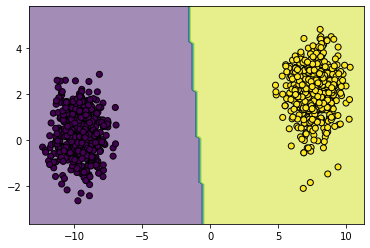

In [15]:
#on dessine les frontières de décision
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.show()

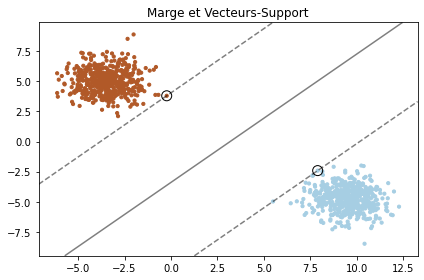

In [60]:
#on trace les vecteurs supports
clf = svm.SVC(C=100, kernel='linear').fit(X, y)
decision_function = clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X[support_vector_indices]

plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=plt.cm.Paired)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(clf,X,ax=ax,grid_resolution=50,plot_method="contour",colors="k",levels=[-1, 0, 1],alpha=0.5,linestyles=["--", "-", "--"])

plt.scatter(support_vectors[:, 0],support_vectors[:, 1],s=100,linewidth=1,facecolors="none",edgecolors="k")  
plt.title("Marge et Vecteurs-Support")
plt.show()

Lorsqu'on relance l'expérience une fois, le taux d'erreur en apprentissage reste extrêmement bas (0).
Ce taux est normal car les clusters sont très bien séparés (std).

Le SVM n'est pas adapté aux grands ensembles de données en raison de son temps d'apprentissage élevé et il prend également plus de temps dans l'apprentissage. Il fonctionne mal avec les classes qui se chevauchent.

### 2. Données non linéairement séparables


##### a) Générer une base de données B2 à l’aide de la fonction make_blobs, en augmentant la valeur du paramètre std. 

In [17]:
X2,y2 = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=15.0, center_box=(-10.0, 10.0))

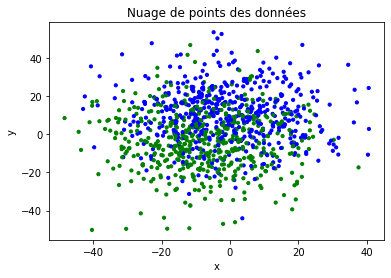

In [18]:
#on dessine les nuages de points
colors = np.array([x for x in "bgrcmyk"])
plt.scatter(X2[:,0],X2[:,1], color=colors[y2].tolist(), s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nuage de points des données')
plt.show()

On voit que les données sont très mélangées et donc difficilement linéairement séparables.

##### b) Séparer cette base de données B2 en deux : apprentissage et test (échantillonnage stratifié sans remise). Pourquoi ?

In [19]:
#on sépare nos données en entrainement/test
#70% training et 30% test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

In [37]:
#on vérifie la bonne séparation des données
print(X2_train.shape)
print(X2_test.shape)

(700, 2)
(300, 2)


On utilise une répartition stratifiée : la distribution d’une variable, les labels, sera la même dans les bases d’apprentissages et de tests.

##### c) Relaxer les contraintes (SVM à marge souple) en faisant varier C sur une échelle logarithmique. Calculer les erreurs en apprentissage et en test pour chaque valeur de C. Rassembler les résultats dans un tableau.

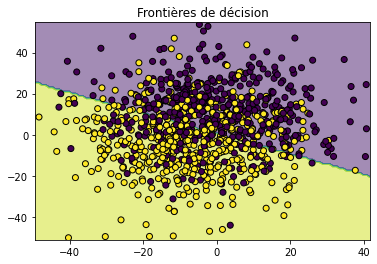

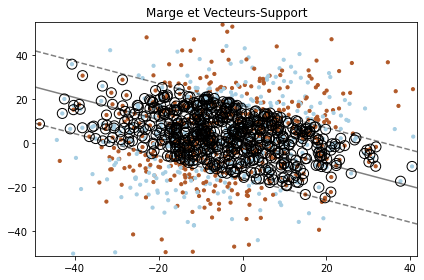

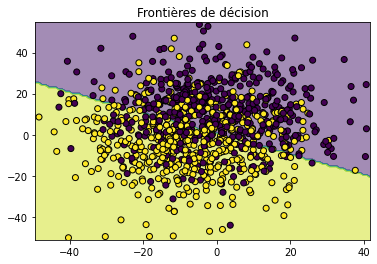

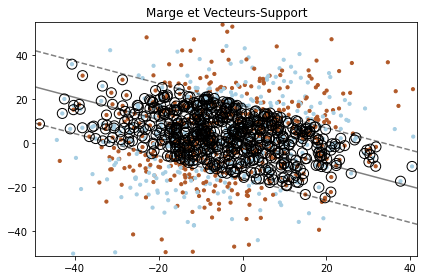

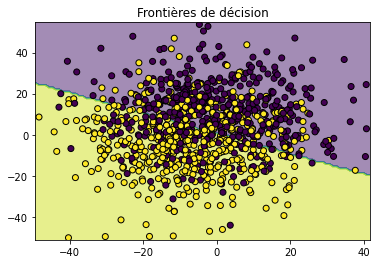

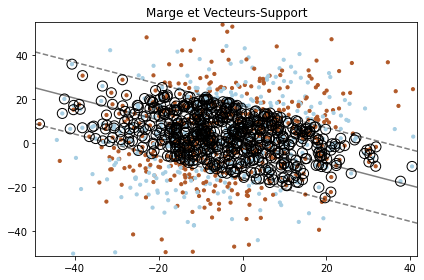

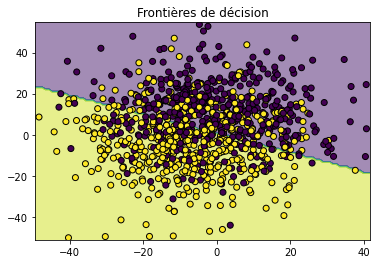

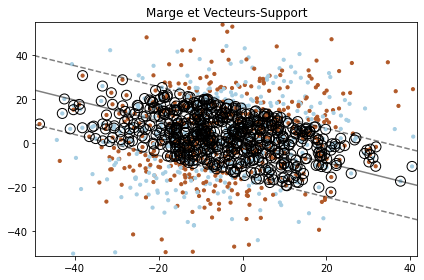

In [55]:
#création des tableaux
tx_erreur_app = []
tx_erreur_test = []
valC = [1, 10, 100, 1000]
supp_vector = []

#on boucle sur les différentes valeurs de C
for i in valC:
    model = svm.SVC(C=i, kernel='linear') #on crée notre classifieur
    model.fit(X2_train, y2_train) #on entraine le modèle sur les données d'entrainement
    y2_pred_app = model.predict(X2_train) #prédiction des labels pour les données d'entrainement
    y2_pred_test = model.predict(X2_test) #prédiction des labels pour les données de test
    tx_erreur_app.append(1-(metrics.accuracy_score(y2_train, y2_pred_app))) #calcul du taux d'erreur en apprentissage
    tx_erreur_test.append(1-(metrics.accuracy_score(y2_test, y2_pred_test))) #calcul du taux d'erreur en test
    supp_vector.append(model.support_vectors_) #vecteurs supports
    
    #affichage des frontières
    disp = DecisionBoundaryDisplay.from_estimator(model, X2, response_method="predict",alpha=0.5)
    disp.ax_.scatter(X2[:, 0], X2[:, 1], c=y2, edgecolor="k")
    plt.title("Frontières de décision")
    plt.show()
    
    #affichage des vecteurs supports
    model.fit(X2, y2)
    decision_function = model.decision_function(X2)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X2[support_vector_indices]
    plt.scatter(X2[:, 0], X2[:, 1], c=y, s=10, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(model,X2,ax=ax,grid_resolution=50,plot_method="contour",colors="k",levels=[-1, 0, 1],alpha=0.5,linestyles=["--", "-", "--"])
    plt.scatter(support_vectors[:, 0],support_vectors[:, 1],s=100,linewidth=1,facecolors="none",edgecolors="k")
    plt.title("Marge et Vecteurs-Support")
    plt.show()

In [56]:
#résultats des taux d'erreur selon C
df = pd.DataFrame(list(zip(valC, tx_erreur_app, tx_erreur_test)), columns = ['C','Erreur en training', 'Erreur en test'])
df

,C,Erreur en training,Erreur en test
0,1,0.292857,0.313333
1,10,0.291429,0.313333
2,100,0.291429,0.320000
3,1000,0.291429,0.323333


In [57]:
#Vecteurs Supports selon C
df1 = pd.DataFrame(list(zip(valC, supp_vector)), columns = ['C','Vecteurs Supports'])
df1

,C,Vecteurs Supports
0,1,"[[-13.712215137595619, -9.994895719209815], [-..."
1,10,"[[-13.712215137595619, -9.994895719209815], [-..."
2,100,"[[-13.712215137595619, -9.994895719209815], [-..."
3,1000,"[[-13.712215137595619, -9.994895719209815], [5..."


Si on met une STD à 2, on remarque que les données sont ni trop éloignées, ni trop mélangées. Le SVM a donc un champ d'application approprié puisque les données sont linéairement séparables, il pourra donc bien généraliser en test et avoir des performances satisfaisantes :

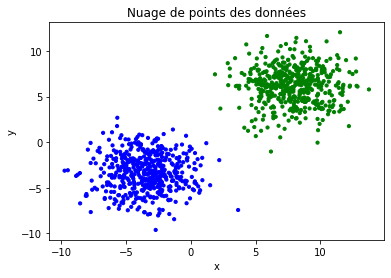

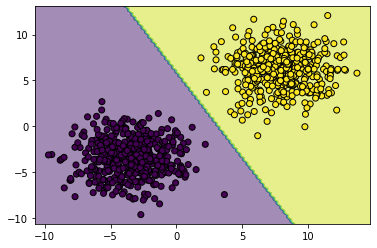

In [50]:
#on met une variance à 2
X3,y3 = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=2.0, center_box=(-10.0, 10.0))

#on dessine les nuages de points
colors = np.array([x for x in "bgrcmyk"])
plt.scatter(X3[:,0],X3[:,1], color=colors[y3].tolist(), s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nuage de points des données')
plt.show()

#on sépare nos données
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size=0.70)

#on crée notre classifieur et on l'entraine
nouv_model = svm.SVC(C=10, kernel='linear')
nouv_model.fit(X3_train, y3_train)

#on fait nos prédictions en apprentissage et en test
y3_pred_app = nouv_model.predict(X3_train)
y3_pred_test = nouv_model.predict(X3_test)

#on calcule l'erreur en apprentissage et en test
tx_err_app = 1 - metrics.accuracy_score(y3_pred_app, y3_train)
tx_err_test = 1 - metrics.accuracy_score(y3_pred_test, y3_test)

#affichage des frontières
disp = DecisionBoundaryDisplay.from_estimator(nouv_model, X3, response_method="predict",alpha=0.5)
disp.ax_.scatter(X3[:, 0], X3[:, 1], c=y3, edgecolor="k")
plt.show()

##### d) Conclure :
- sur la capacité d’un SVM linéaire à séparer des données non linéairement séparables.
- sur les performances en test. 

La STD à 15 est trop élevée, les données sont des différents clusters sont mélangés donc les données ne sont pas linéairement séparables et il est donc logique d'avoir des taux d'erreur élevés en test. Il faudrait pour cela sortir d'un kernel linéaire.